In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def parser(time_data):
    return pd.datetime.strptime('2017-'+time_data,'%Y-%d-%m %H:%M:%S')
data3 = pd.read_csv('../data/namenode_1130.csv',header=0,index_col=0, parse_dates=[0], date_parser=parser)

In [3]:
data = data3.rename(columns={'cpu process':'top_cpu','memory process':'top_mem'})
data['top_cpu'] = data['top_cpu'].str.partition('/')[0]
data['top_mem'] = data['top_mem'].str.partition('/')[0]

In [4]:
data.columns.values

array(['usr', 'sys', 'idl', 'wai', 'hiq', 'siq', 'used', 'buff', 'cach',
       'free', 'recv', 'send', 'read', 'writ', 'top_cpu', 'top_mem'], dtype=object)

Text(0.5,1,u'usr')

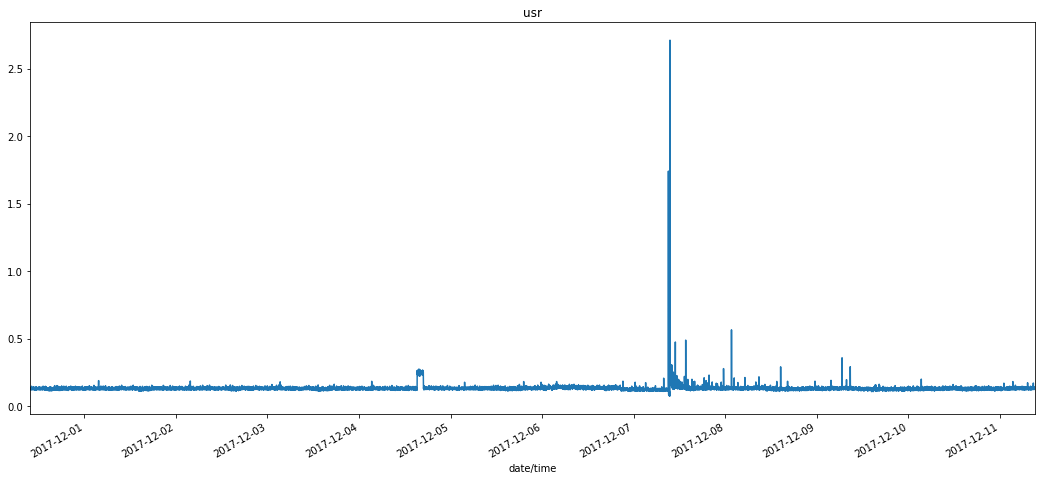

Text(0.5,1,u'sys')

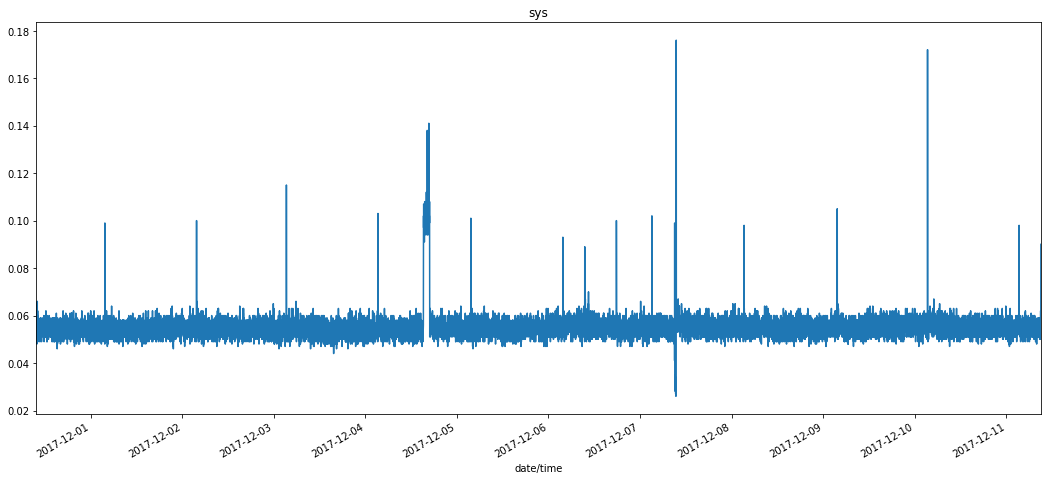

Text(0.5,1,u'used')

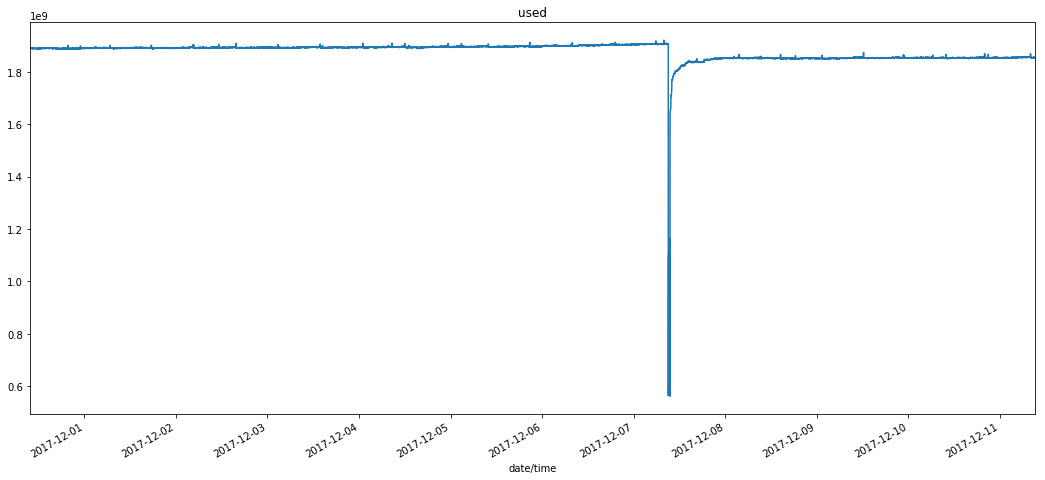

Text(0.5,1,u'buff')

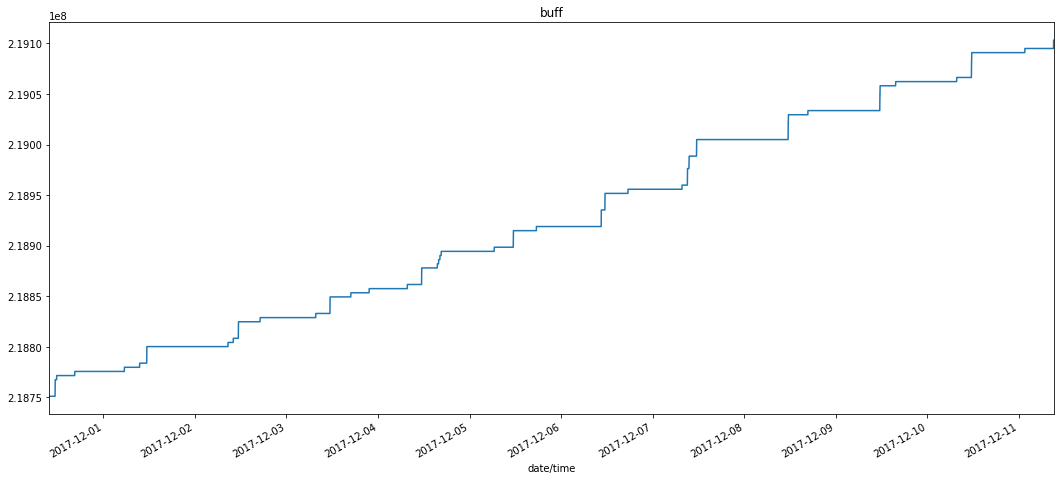

Text(0.5,1,u'cach')

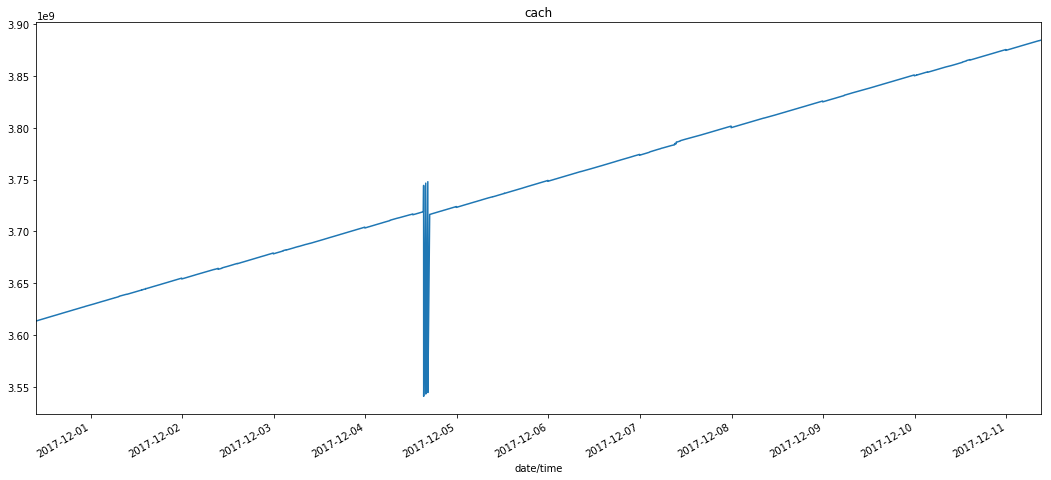

Text(0.5,1,u'free')

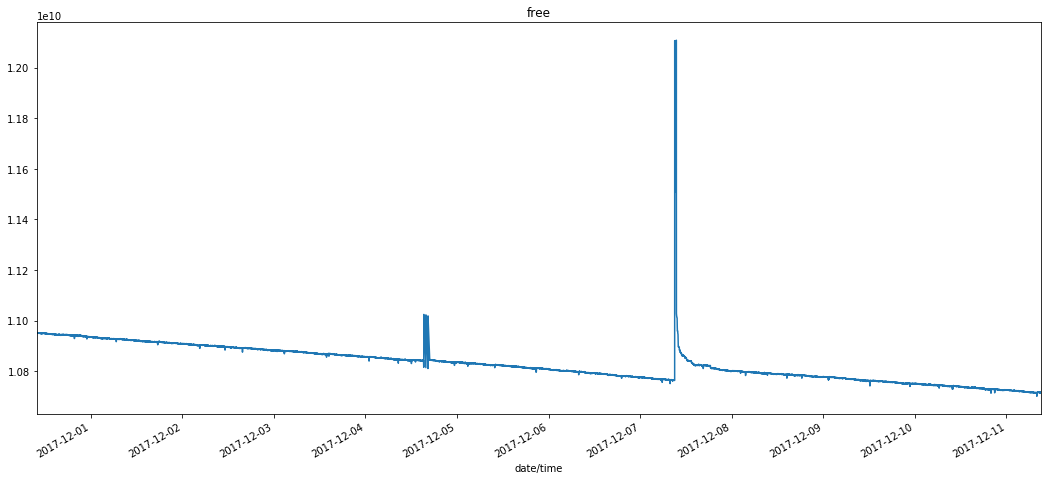

Text(0.5,1,u'recv')

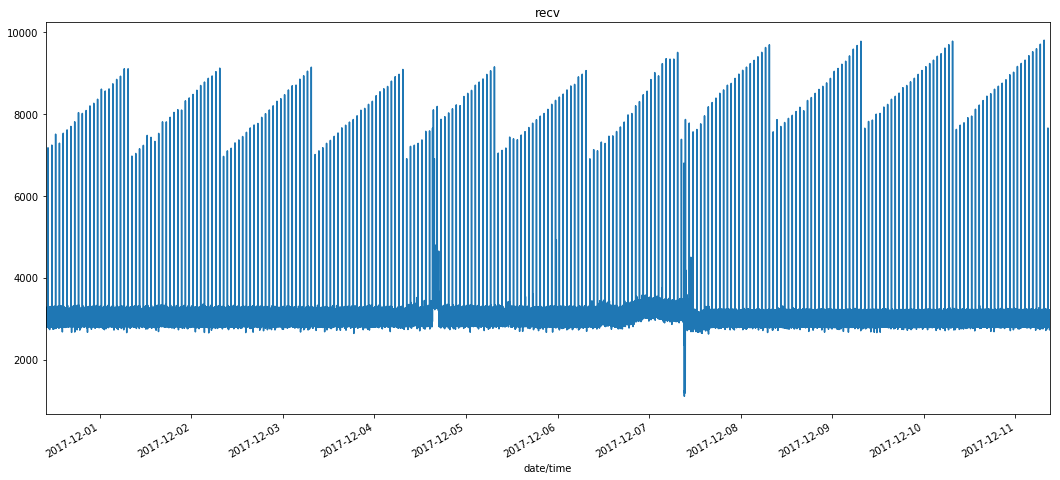

Text(0.5,1,u'send')

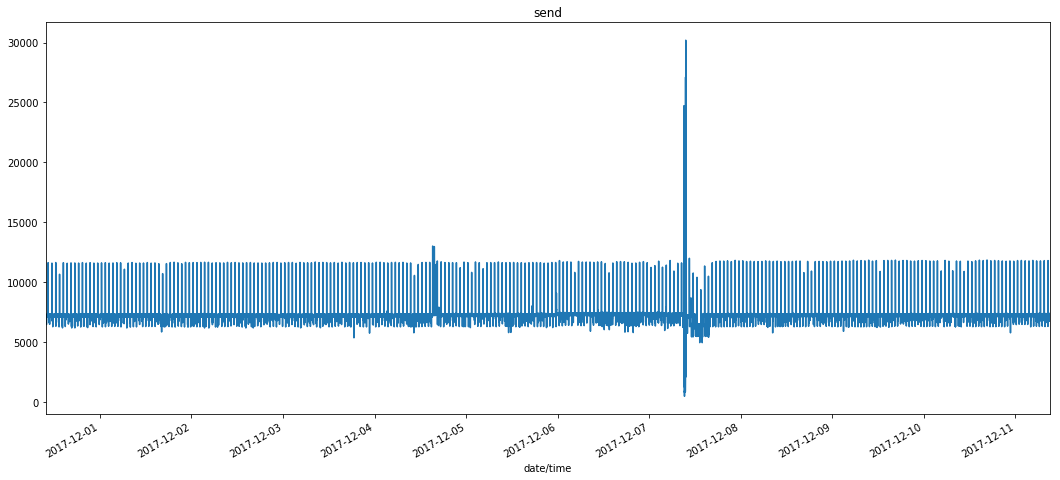

Text(0.5,1,u'read')

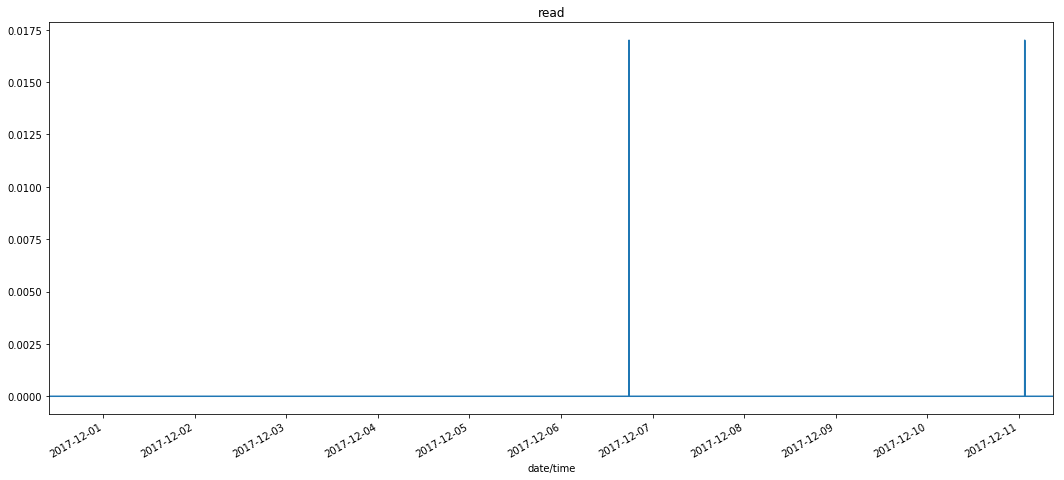

Text(0.5,1,u'writ')

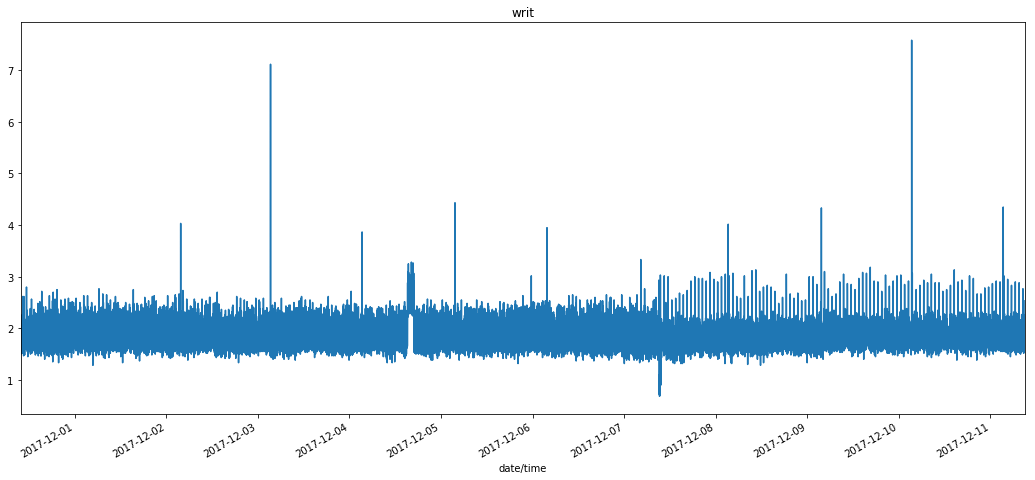

In [5]:
cols = ['usr', 'sys', 'used', 'buff', 'cach','free', 'recv', 'send', 'read', 'writ']
for col in cols:
    data[col].plot()
    plt.gcf().set_size_inches(18,8)
    plt.title(col)
    plt.show()

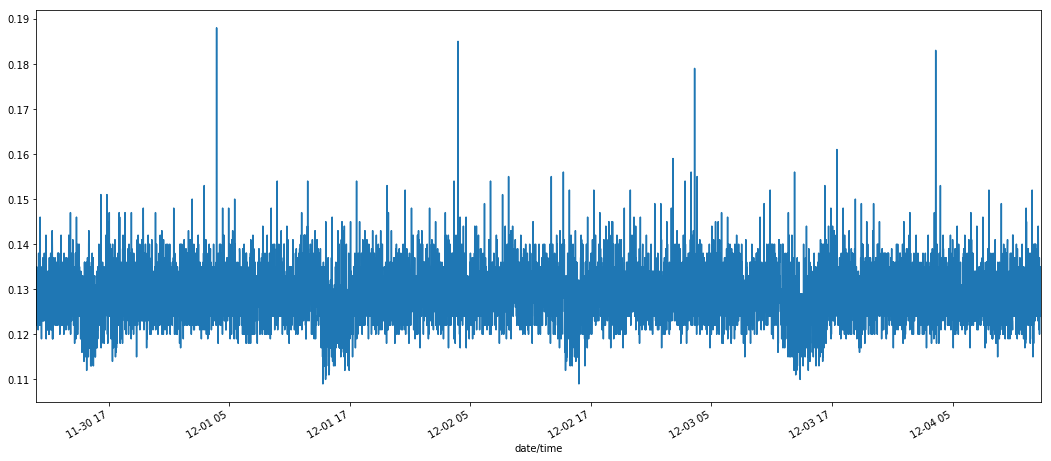

In [6]:
data['usr'][:6000].plot()
plt.gcf().set_size_inches(18,8)
plt.show()

In [27]:
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing

tmp_data=data.loc[:,['usr','used']]

# normalize the dataset
scaler = preprocessing.MinMaxScaler()
tmp_data['norm_usr'] = scaler.fit_transform(tmp_data['usr'].values.reshape(-1,1))
tmp_data['norm_used'] = scaler.fit_transform(tmp_data['used'].values.reshape(-1,1))
ilf = IsolationForest(n_estimators=100,n_jobs=-1,verbose=2)
ilf.fit(tmp_data['norm_usr'].values.reshape(-1,1))
tmp_data['ilf'] = ilf.predict(tmp_data['norm_usr'].values.reshape(-1,1))

Building estimator 1 of 5 for this parallel run (total 100)...
Building estimator 1 of 4 for this parallel run (total 100)...
Building estimator 1 of 5 for this parallel run (total 100)...
Building estimator 1 of 5 for this parallel run (total 100)...
Building estimator 2 of 5 for this parallel run (total 100)...
Building estimator 1 of 5 for this parallel run (total 100)...
Building estimator 2 of 5 for this parallel run (total 100)...
Building estimator 2 of 5 for this parallel run (total 100)...
Building estimator 3 of 5 for this parallel run (total 100)...
Building estimator 3 of 5 for this parallel run (total 100)...
Building estimator 1 of 4 for this parallel run (total 100)...
Building estimator 2 of 5 for this parallel run (total 100)...
Building estimator 4 of 5 for this parallel run (total 100)...
Building estimator 1 of 4 for this parallel run (total 100)...
Building estimator 4 of 5 for this parallel run (total 100)...
Building estimator 3 of 5 for this parallel run (total 

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    0.2s finished


IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=-1, random_state=None,
        verbose=2)

usr          used  norm_usr  norm_used  ilf
date/time                                                         
2017-11-30 09:48:39  0.127  1.890542e+09  0.020849   0.977895    1
2017-11-30 09:49:39  0.135  1.889333e+09  0.023882   0.977006    1
2017-11-30 09:50:40  0.122  1.889079e+09  0.018954   0.976819    1
2017-11-30 09:51:39  0.134  1.889284e+09  0.023503   0.976970    1
2017-11-30 09:52:39  0.122  1.889292e+09  0.018954   0.976976    1
2017-11-30 09:53:40  0.131  1.889784e+09  0.022365   0.977337    1
2017-11-30 09:54:40  0.123  1.889649e+09  0.019333   0.977238    1
2017-11-30 09:55:40  0.133  1.889792e+09  0.023124   0.977343    1
2017-11-30 09:56:40  0.124  1.889141e+09  0.019712   0.976864    1
2017-11-30 09:57:39  0.133  1.890361e+09  0.023124   0.977762    1
2017-11-30 09:58:39  0.121  1.889096e+09  0.018575   0.976831    1
2017-11-30 09:59:40  0.131  1.888731e+09  0.022365   0.976563    1
2017-11-30 10:00:40  0.122  1.889341e+09  0.018954   0.977012    1
2017-11-30 10:01:40  0.138  1.889227e+09  0.025019   0.976927    1
2017-11-30 10:02:40  0.124  1.888834e+09  0.019712   0.976638    1
2017-11-30 10:03:40  0.130  1.888670e+09  0.021986   0.976517    1
2017-11-30 10:04:39  0.126  1.888453e+09  0.020470   0.976358    1
2017-11-30 10:05:40  0.137  1.889952e+09  0.024640   0.977461    1
2017-11-30 10:06:40  0.124  1.889956e+09  0.019712   0.977464    1
2017-11-30 10:07:40  0.133  1.889022e+09  0.023124   0.976777    1
2017-11-30 10:08:39  0.122  1.889378e+09  0.018954   0.977039    1
2017-11-30 10:09:40  0.138  1.889575e+09  0.025019   0.977184    1
2017-11-30 10:10:40  0.146  1.889575e+09  0.028052   0.977184   -1
2017-11-30 10:11:40  0.133  1.890320e+09  0.023124   0.977732    1
2017-11-30 10:12:40  0.123  1.889911e+09  0.019333   0.977431    1
2017-11-30 10:13:40  0.131  1.889747e+09  0.022365   0.977310    1
2017-11-30 10:14:40  0.124  1.890570e+09  0.019712   0.977916    1
2017-11-30 10:15:39  0.135  1.889497e+09  0.023882   0.977126    1
2017-11-30 10:16:40  0.126  1.889788e+09  0.020470   0.977340    1
2017-11-30 10:17:40  0.130  1.889554e+09  0.021986   0.977168    1
...                    ...           ...       ...        ...  ...
2017-12-11 08:35:40  0.131  1.854710e+09  0.022365   0.951528    1
2017-12-11 08:36:40  0.122  1.854099e+09  0.018954   0.951079    1
2017-12-11 08:37:39  0.145  1.854616e+09  0.027672   0.951459   -1
2017-12-11 08:38:39  0.127  1.853792e+09  0.020849   0.950853    1
2017-12-11 08:39:40  0.140  1.853993e+09  0.025777   0.951000    1
2017-12-11 08:40:40  0.122  1.853604e+09  0.018954   0.950714    1
2017-12-11 08:41:40  0.133  1.854243e+09  0.023124   0.951184    1
2017-12-11 08:42:40  0.129  1.853915e+09  0.021607   0.950943    1
2017-12-11 08:43:40  0.133  1.852805e+09  0.023124   0.950126    1
2017-12-11 08:44:40  0.170  1.853555e+09  0.037149   0.950678   -1
2017-12-11 08:45:40  0.129  1.854267e+09  0.021607   0.951202    1
2017-12-11 08:46:40  0.124  1.853370e+09  0.019712   0.950542    1
2017-12-11 08:47:40  0.136  1.855181e+09  0.024261   0.951874    1
2017-12-11 08:48:40  0.126  1.853780e+09  0.020470   0.950844    1
2017-12-11 08:49:40  0.132  1.855713e+09  0.022745   0.952266    1
2017-12-11 08:50:40  0.127  1.855037e+09  0.020849   0.951769    1
2017-12-11 08:51:40  0.133  1.854165e+09  0.023124   0.951127    1
2017-12-11 08:52:40  0.128  1.853555e+09  0.021228   0.950678    1
2017-12-11 08:53:40  0.131  1.854333e+09  0.022365   0.951251    1
2017-12-11 08:54:40  0.127  1.853014e+09  0.020849   0.950280    1
2017-12-11 08:55:40  0.134  1.853551e+09  0.023503   0.950675    1
2017-12-11 08:56:40  0.127  1.853051e+09  0.020849   0.950307    1
2017-12-11 08:57:40  0.141  1.853383e+09  0.026156   0.950551    1
2017-12-11 08:58:39  0.122  1.852699e+09  0.018954   0.950048    1
2017-12-11 08:59:39  0.131  1.855033e+09  0.022365   0.951766    1
2017-12-11 09:00:40  0.126  1.853387e+09  0.020470   0.950554    1
2017-12-11 09:01:39  0.138  1.854022e+09  0.025019   0.951021    1
201

In [47]:
tmp_data[tmp_data['ilf']==1].index

DatetimeIndex(['2017-11-30 09:48:39', '2017-11-30 09:49:39',
               '2017-11-30 09:50:40', '2017-11-30 09:51:39',
               '2017-11-30 09:52:39', '2017-11-30 09:53:40',
               '2017-11-30 09:54:40', '2017-11-30 09:55:40',
               '2017-11-30 09:56:40', '2017-11-30 09:57:39',
               ...
               '2017-12-11 08:55:40', '2017-12-11 08:56:40',
               '2017-12-11 08:57:40', '2017-12-11 08:58:39',
               '2017-12-11 08:59:39', '2017-12-11 09:00:40',
               '2017-12-11 09:01:39', '2017-12-11 09:02:40',
               '2017-12-11 09:03:40', '2017-12-11 09:04:40'],
              dtype='datetime64[ns]', name=u'date/time', length=14168, freq=None)

ValueError: x and y must be the same size

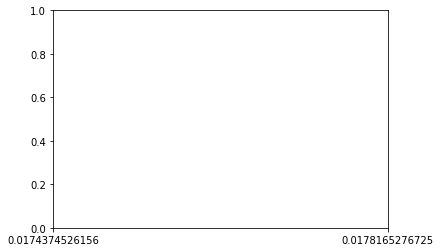

In [49]:
plt.scatter(tmp_data[tmp_data['ilf']==1],1,color='r')
plt.scatter(tmp_data[tmp_data['ilf']==-1],1,color='m', alpha=0.5)
plt.gcf().set_size_inches(18,8)
plt.show()

In [31]:
tmp_data['ilf'].value_counts()

 1    14168
-1     1629
Name: ilf, dtype: int64

In [35]:
tmp_data.describe()

usr          used      norm_usr     norm_used           ilf
count  15797.000000  1.579700e+04  15797.000000  15797.000000  15797.000000
mean       0.131040  1.876904e+09      0.022381      0.967860      0.793758
std        0.029771  4.063919e+07      0.011285      0.029905      0.608253
min        0.072000  5.616189e+08      0.000000      0.000000     -1.000000
25%        0.124000  1.853247e+09      0.019712      0.950452      1.000000
50%        0.129000  1.891164e+09      0.021607      0.978353      1.000000
75%        0.135000  1.894789e+09      0.023882      0.981020      1.000000
max        2.710000  1.920582e+09      1.000000      1.000000      1.000000